## <center>The Sparks Foundation</center>
### <center>TASK #1 - Prediction using Supervised ML</center>
### <center>Domain : Data Science and Business Analytics</center>
### <center>Author : Akshay Pandurang Paunikar</center>

#### Overview and Objectives:
    Predict the percentage of a student based on number of study hours.
    This is a Simple Linear Regression Task as it involves just 2 variables.
    What will be the predicted score if student studies for 9.25 hours?

In [50]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
# load the data from url
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

In [52]:
# Lets see the first 5 records from our data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
# check how many rows and columns are in our data
data.shape

(25, 2)

There are 25 rows and 2 columns in our data

In [54]:
# datatypes of the dataframe
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [55]:
# Generate descriptive statistics.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [56]:
# Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
#check for any null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here we can see that there are no missing values in our data

#### Now we will plot scatterplot between Hours and Scores to see the relation between them

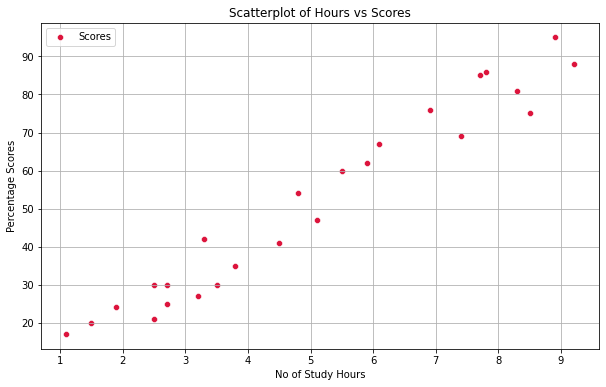

In [58]:
#Scatterplot of Hours vs Scores
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Hours,y=data.Scores,color='crimson')
plt.legend(['Scores'])
plt.xlabel('No of Study Hours')
plt.ylabel('Percentage Scores')
plt.title('Scatterplot of Hours vs Scores')
plt.grid('True')
plt.show()

#### From above scatterplot we can see that there is a positive linear relationship between no of hours studied and percentage scores obtained i.e. as the number of hours increases the percentage score also increases.

### Now we will separate the data into features (X) and target (y) for further analysis

In [59]:
# creating feature (X) and target (y) variables
X = data.drop('Scores',axis=1)
y = data.Scores

In [60]:
# Now we will divide the data into train and test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [61]:
# check the shape of train and test data
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (18, 1)
X_test : (7, 1)
y_train : (18,)
y_test : (7,)


## Linear Regression model

In [62]:
# Linear Regression
lin_reg = LinearRegression()

In [63]:
# now fit the training data to train the model
lin_reg.fit(X_train,y_train)

LinearRegression()

In [64]:
#check the score of our model
lin_reg.score(X_train,y_train)

0.9484509249326872

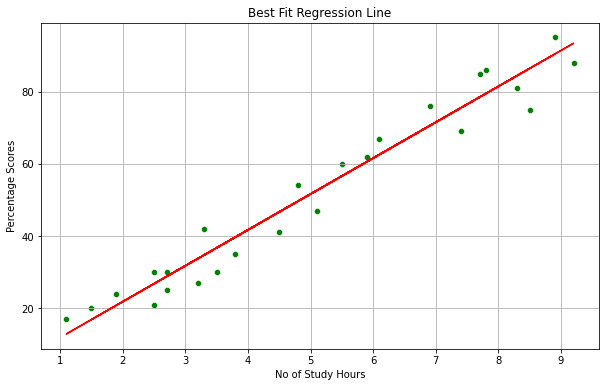

In [65]:
# Now we will plot the regression line
reg = lin_reg.coef_ * X + lin_reg.intercept_
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.Hours,y=data.Scores,color='green')
plt.plot(X,reg,color='red')
plt.xlabel('No of Study Hours')
plt.ylabel('Percentage Scores')
plt.title('Best Fit Regression Line')
plt.grid('True')
plt.show()

In [66]:
# Now we will make predictions on our test data X_test
predictions = lin_reg.predict(X_test)

In [67]:
# caompare Actual Vs Predicted values
comparison = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
comparison

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


#### Now we will evaluate our model using R2 score, RMSE, Mean Absolute Error

In [68]:
# R2 Score
print("R2 Score :", r2_score(y_true=y_test, y_pred=predictions))
print()
# RMSE
print("RMSE :", np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions)))
print()
# Mean Absolute Error
print("Mean Absolute Error :", mean_absolute_error(y_true=y_test, y_pred=predictions))

R2 Score : 0.9367661043365055

RMSE : 4.5092043283688055

Mean Absolute Error : 4.130879918502486


#### What will be the predicted score if student studies for 9.25 hours ?

In [69]:
sample = [[9.25]]
sample_predict = lin_reg.predict(sample)
print(sample_predict)

[93.89272889]


###### So if the student studies for 9.25 hours his/her score will be 93.89

#### Summary:
    1. There are no null/missing values in our data.
    2. There is a positive linear relationship between no of hours studied and percentage scores obtained.
    3. Using Linear Regression we obtained model score of 0.9484 and our evalution scote on test data is 0.9367 which is 
       nearly similar to the model score so our model is not overfitting.
    4. Also we can use other ML algorithms but in this case linear regression is working pretty good.